In [1]:
# Import Statements
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import shap
from math import sqrt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
# Load full dataset

In [8]:
Final_data = pd.read_pickle("first_model_chr_data.pkl")
Final_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117,Rep_Location,Year,DTF
Germplasm_Name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,1_Sutherland_Canada,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2_Sutherland_Canada,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,3_Sutherland_Canada,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,1_Metaponto_Italy,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2_Metaponto_Italy,2016,133.0


In [24]:
## One hot encoding data

In [2]:
ohe_data = pd.read_pickle("ohe_data_firstmodel_chr.pkl")
ohe_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year,DTF
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,133.0


In [3]:
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15591 entries, 3156-11_AGL to W6_27767_LSP_AGL
Columns: 92971 entries, Chr1_58474 to DTF
dtypes: float64(1), int64(92970)
memory usage: 10.8+ GB


In [16]:
#Split dataset into training,test and holdout (leave one environnment out)

In [3]:
ho_set = ohe_data[(ohe_data['Year'] == 2017) & 
                  ((ohe_data['1_Jessore_Bangladesh'] == 1) | 
                   (ohe_data['2_Jessore_Bangladesh'] == 1) | 
                   (ohe_data['3_Jessore_Bangladesh'] == 1))]

Ignoring `palette` because no `hue` variable has been assigned.


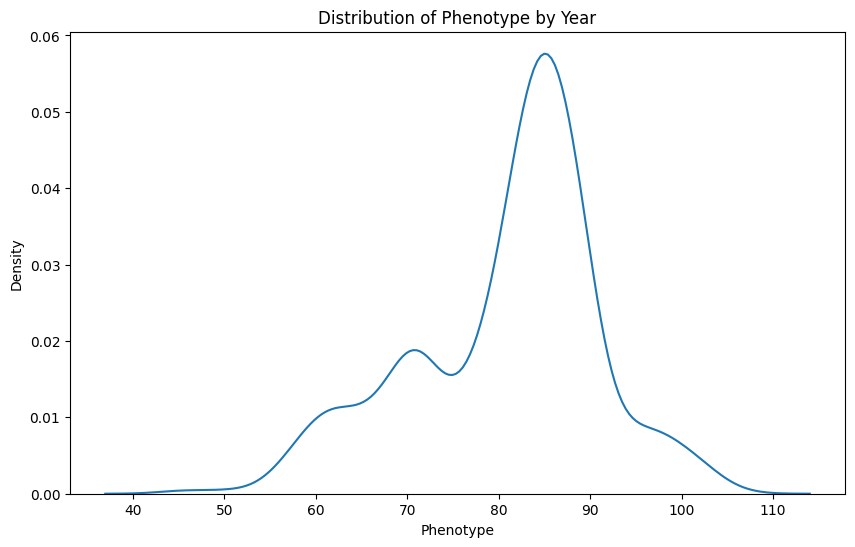

In [6]:
# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ho_set, x='DTF', fill=False, common_norm=False, palette="viridis")

# Set labels and title
plt.xlabel('Phenotype')
plt.ylabel('Density')
plt.title('Distribution of Phenotype by Year')

# Show the plot
plt.show()

In [4]:
ho_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 3156-11_AGL to W6_27767_LSP_AGL
Columns: 92971 entries, Chr1_58474 to DTF
dtypes: float64(1), int64(92970)
memory usage: 576.7+ MB


In [8]:
ho_set.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year,DTF
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017,88.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017,88.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2017,88.0
CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2017,94.0
CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2017,90.0


In [5]:
ho_snps = ho_set.iloc[:, 0:92970]
ho_snps.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2017
CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2017


In [6]:
ho_dtf = ho_set.iloc[:, 92970:]
ho_dtf.head()

,DTF
Accession_name,
3156-11_AGL,88.0
3156-11_AGL,88.0
3156-11_AGL,88.0
CDC_Asterix_AGL,94.0
CDC_Asterix_AGL,90.0


In [7]:
tt_set = ohe_data[~((ohe_data['Year'] == 2017) & 
                    ((ohe_data['1_Jessore_Bangladesh'] == 1) | 
                     (ohe_data['2_Jessore_Bangladesh'] == 1) | 
                     (ohe_data['3_Jessore_Bangladesh'] == 1)))]

Ignoring `palette` because no `hue` variable has been assigned.


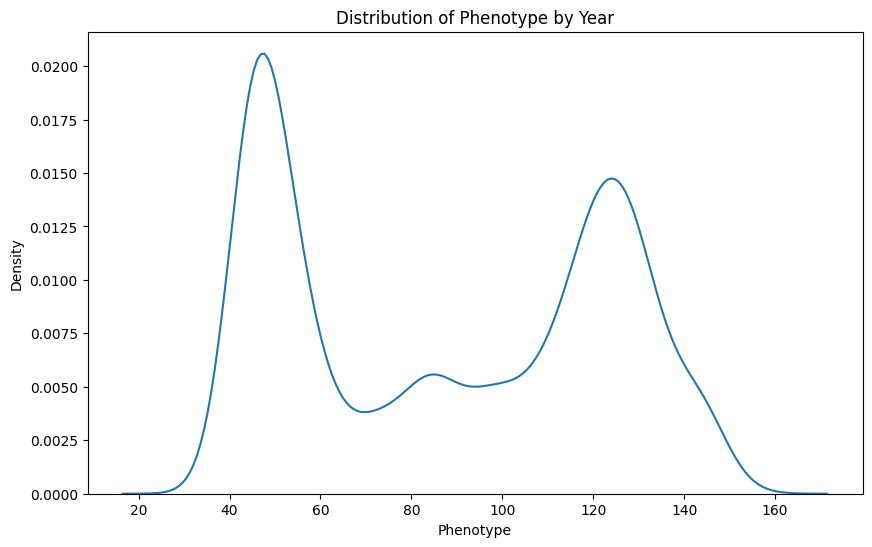

In [12]:
# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tt_set, x='DTF', fill=False, common_norm=False, palette="viridis")

# Set labels and title
plt.xlabel('Phenotype')
plt.ylabel('Density')
plt.title('Distribution of Phenotype by Year')

# Show the plot
plt.show()

In [8]:
tt_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14778 entries, 3156-11_AGL to W6_27767_LSP_AGL
Columns: 92971 entries, Chr1_58474 to DTF
dtypes: float64(1), int64(92970)
memory usage: 10.2+ GB


In [14]:
tt_set.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year,DTF
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,133.0


In [9]:
snps = tt_set.iloc[:, 0:92970]
snps.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016


In [10]:
dtf = tt_set.iloc[:, 92970:]
dtf.head()

,DTF
Accession_name,
3156-11_AGL,57.0
3156-11_AGL,54.0
3156-11_AGL,53.0
3156-11_AGL,135.0
3156-11_AGL,133.0


In [24]:
X_full, X_test, y_full, y_test = train_test_split(snps, dtf, test_size=0.1, random_state=42, shuffle=True)

In [25]:
X_full.isnull().values.any()

False

In [26]:
X_full = X_full.to_numpy() #convert to numpy array to avoid errors

In [27]:
y_full = y_full.to_numpy()

In [17]:
y_full.dtype

dtype('float64')

In [11]:
parameters = {
        'gamma': [0, 0.5, 1],                 
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 150, 200],                                                                   
        }

In [12]:
model_to_set = xgb.XGBRegressor(n_jobs=-1)

In [13]:
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring='neg_mean_squared_error', cv=5)

In [ ]:
model_tunning.fit(X_full, y_full)

In [ ]:
print(model_tunning.best_score_)
print(model_tunning.best_params_)

In [ ]:
#Best Score: -21.319945535727545
#Best Parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [11]:
xgbreg = xgb.XGBRegressor(n_jobs =-1 , gamma= 1, learning_rate = 0.1, max_depth=7, n_estimators= 200)

In [ ]:
## Not doing this, instead moving ot CV

In [52]:
xgbreg.fit(X_full, y_full)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='', learning_rate=0.1,
       max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
       max_leaves=0, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=200, n_jobs=-1,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred_xgboost = xgbreg.predict(X_test)

In [54]:
r2_score(y_test, y_pred_xgboost)

0.9832197598540043

In [55]:
mse = mean_squared_error(y_test, y_pred_xgboost)

In [56]:
rmse = np.sqrt(mse)
print(rmse)

4.578973075749029


In [57]:


#plot the feature importance plots
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.rcParams['figure.figsize'] = [12, 8]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

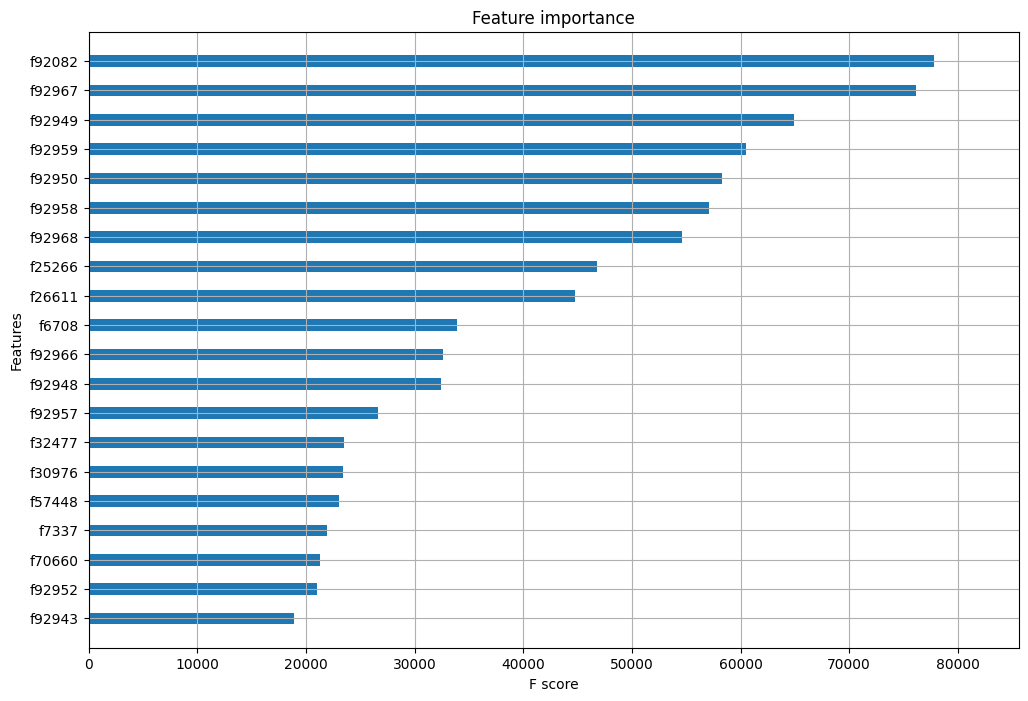

In [58]:
plot_importance(xgbreg, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)

Text(0.5, 0, 'Relative F_Score (GAIN)')

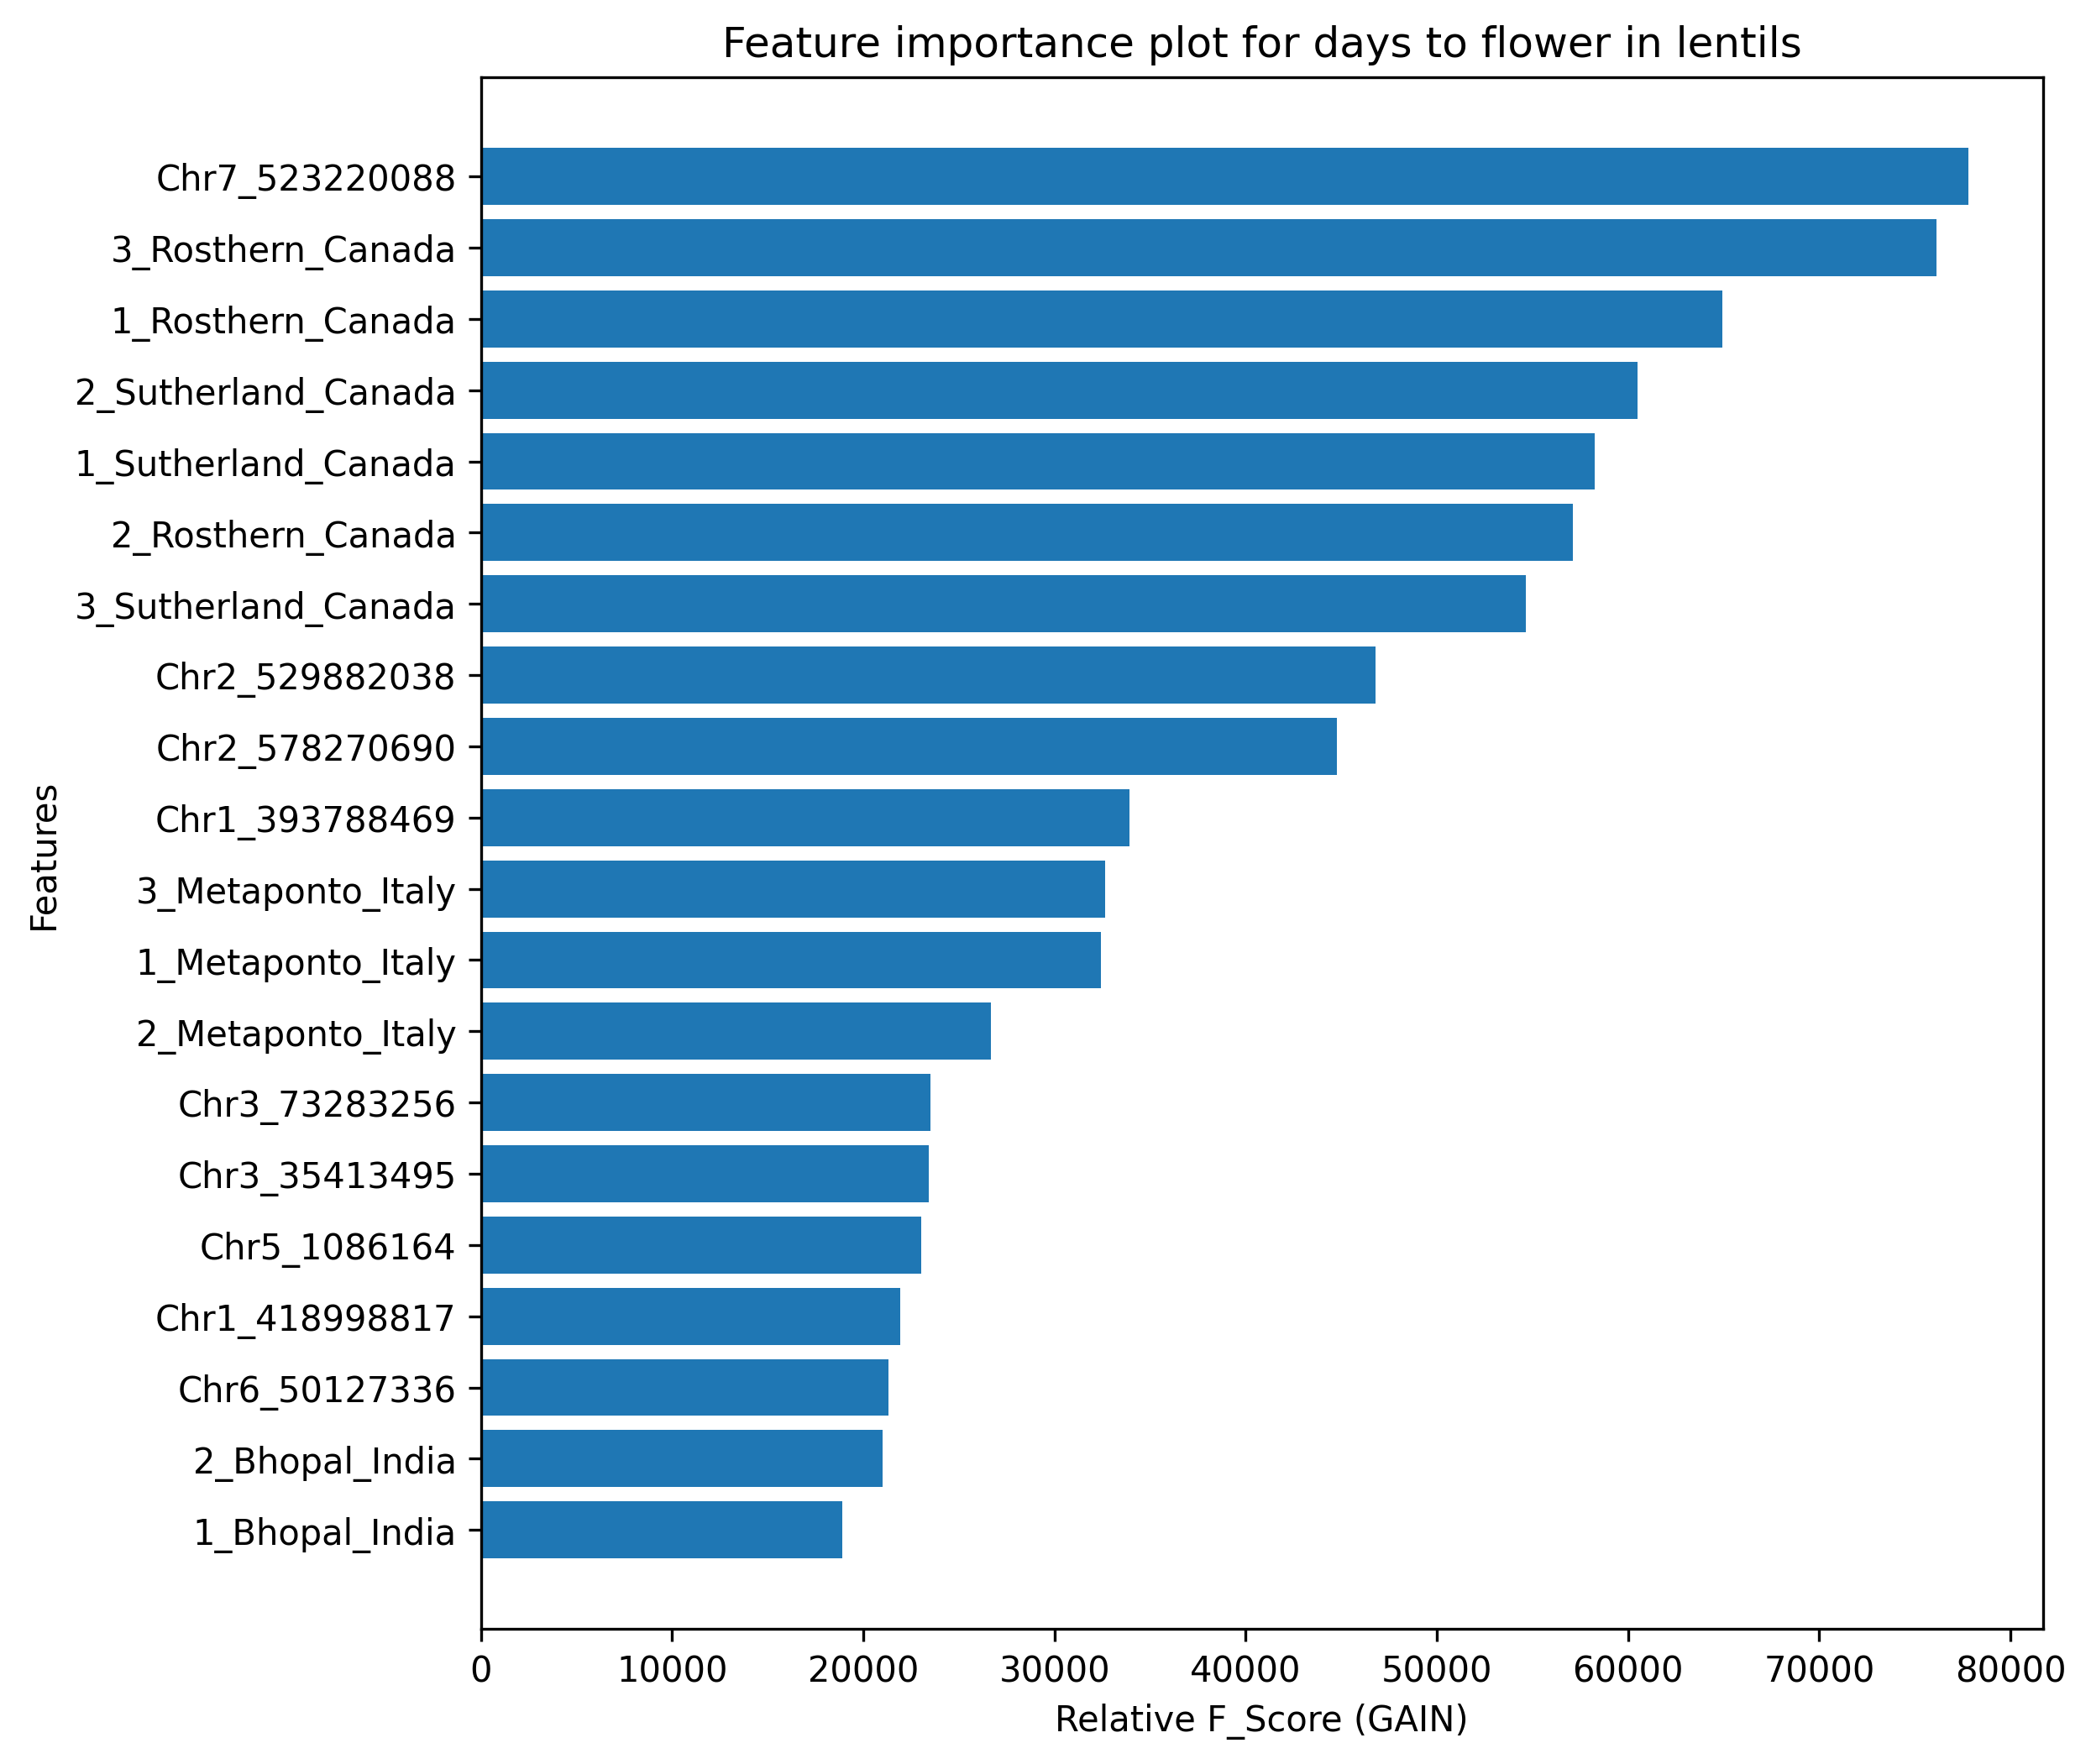

In [60]:
f_names = ['f' + str(i) for i in range(len(snps.columns))]
my_dict = xgbreg.get_booster().get_score(importance_type="gain")

new_dict = {}
for key in my_dict:
    ind = f_names.index(key)
    new_dict[snps.columns[ind]] = my_dict[key]

new_fi = pd.Series(new_dict)
df = new_fi.to_frame()
df = df.rename(columns = {0:'F_Score(GAIN)'})
#plot dataframe now with top 20 SNPS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k')
indexes = df.nlargest(20, "F_Score(GAIN)").index
values = df.nlargest(20, "F_Score(GAIN)").values.ravel()
indexes = indexes[::-1]
values = values[::-1]
plt.barh(indexes, values)
plt.title('Feature importance plot for days to flower in lentils')
plt.ylabel('Features')
plt.xlabel('Relative F_Score (GAIN)')

In [ ]:
## Cross validation

In [12]:
def eval_k_fold(m, x, y, k):
    #model: xgboost model, should be with the best params available
    #x: input data (eg. all samples and SNPS)
    #y: labels
    #k: number of folds for cross validation
    cv = KFold(n_splits=k,shuffle=True)
  #  fig1 = plt.figure(figsize=[12,12])

   # tprs = []
   # aucs = []
    results = []
   # mean_fpr = np.linspace(0,1,100)
    low = 100
    best = m
    i = 1
    for train,test in cv.split(x,y):
        #print(y[test])
        m.fit(x[train],y[train].ravel())
        print("fitting done. Processing fold accuracy + checking best model")
        #predictions = [round(value) for value in y_pred]
        #sees how accurate the model was when testing the test set
        all_preds = [x for x in m.predict(x[test])]
        ss = sqrt(mean_squared_error(all_preds, y[test]))
        rr = r2_score(all_preds, y[test])
        mm = np.mean(y[test])
        error_mean = ((ss/mm)*100)
        print("R^2 Value is: " + str(rr))
        print("RMSE for dataset is:" +str(ss) + "& mean of this fold is " + str(mm))
        print("this is "+ str((ss/mm)*100) + "% of the mean pheno data")
        if(error_mean < low):
            low = error_mean
            best = m
        results.append(error_mean)
        i= i+1
    print("Training Testing Accuracy: %.2f%% (%.2f%%)" % (np.mean(results), np.std(results)))
    return best

In [13]:
snps = snps.to_numpy()
dtf = dtf.to_numpy()

In [14]:
best_model = eval_k_fold(xgbreg, snps, dtf, 10)

fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.98421500296681
RMSE for dataset is:4.522084158822762& mean of this fold is 89.09472259810555
this is 5.075591490666941% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9830709900488687
RMSE for dataset is:4.61934307371619& mean of this fold is 89.31123139377537
this is 5.172186075175019% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9839024519139985
RMSE for dataset is:4.5530424290058225& mean of this fold is 88.38633288227334
this is 5.151296903640377% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9859413682257938
RMSE for dataset is:4.2797371467735985& mean of this fold is 87.97902571041949
this is 4.864497091454767% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9830731831827333
RMSE for dataset is

In [15]:
pickle.dump(best_model, open("best_model_lentil_chr_50_oneenvjessore.pickle.dat", "wb"))
#best_model = pickle.load(open("best_model_lentil_chr_50_oneenv.pickle.dat", "rb"))

In [16]:
ho_snps = ho_snps.to_numpy()
ho_dtf = ho_dtf.to_numpy()

In [17]:
all_preds = [x for x in best_model.predict(ho_snps)]
ss = sqrt(mean_squared_error(all_preds, ho_dtf))
rr = r2_score(all_preds, ho_dtf)
mm = np.mean(ho_dtf)
error_mean = ((ss/mm)*100)
print("R^2 Value of Holdout: %.2f" % rr)
print("RMSE of Holdout: %.2f" % ss)
print("Mean of Holdout: %.2f" % mm)
print("this is "+ str((ss/mm)*100) + "% of the mean pheno data")

R^2 Value of Holdout: 0.53
RMSE of Holdout: 6.61
Mean of Holdout: 80.91
this is 8.16925805416949% of the mean pheno data


0 88.0 91.19211
1 88.0 91.90103
2 88.0 92.40956
3 94.0 88.830986
4 90.0 82.0599
5 93.0 87.43512


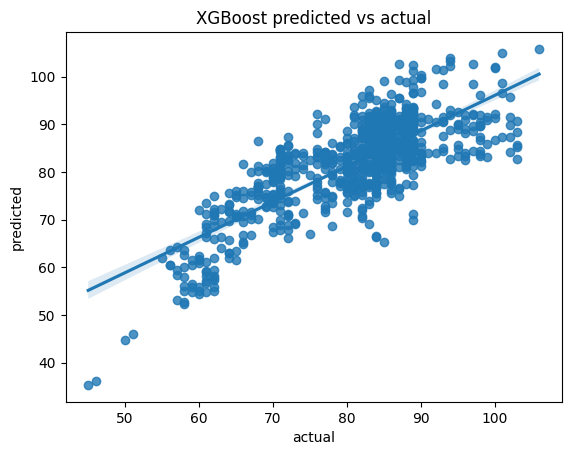

In [18]:
plot_x, plot_y = list(), list()

ho_dtf = ho_dtf.ravel()

for counter, i in enumerate(ho_dtf):
    if counter <= 5:
        print(counter, i, all_preds[counter])
    #zoom in a bit closer
    if(all_preds[counter] > 1):
        plot_x.append(i)
        plot_y.append(all_preds[counter])
    
#plt.plot(plot_x, plot_y, '.')
thisplot = pd.DataFrame({'actual':plot_x, 'predicted':plot_y})
#sns.jointplot(x="Oil", y="preds", data=thisplot, kind='reg' , joint_kws={'scatter_kws': {'alpha': 0.2}})
figure1 = sns.regplot(x="actual", y="predicted", data=thisplot).set_title('XGBoost predicted vs actual')

0 85.0 82.79135
1 119.0 119.80959
2 142.0 142.69647
3 45.0 44.488987
4 49.0 51.579315
5 46.0 45.115215


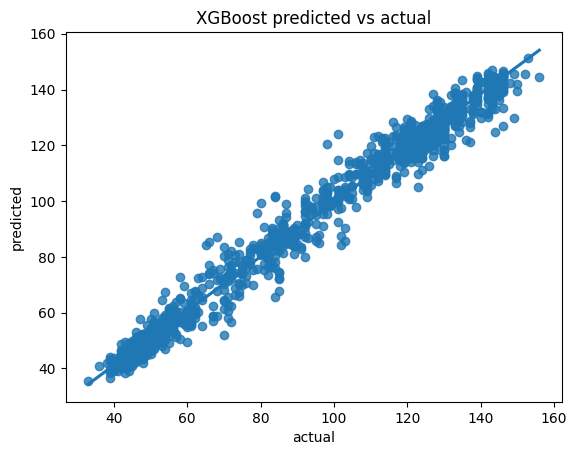

In [20]:
plot_x, plot_y = list(), list()

ho_dtf = ho_dtf.ravel()

for counter, i in enumerate(ho_dtf):
    if counter <= 5:
        print(counter, i, all_preds[counter])
    #zoom in a bit closer
    if(all_preds[counter] > 1):
        plot_x.append(i)
        plot_y.append(all_preds[counter])
    
#plt.plot(plot_x, plot_y, '.')
thisplot = pd.DataFrame({'actual':plot_x, 'predicted':plot_y})
#sns.jointplot(x="Oil", y="preds", data=thisplot, kind='reg' , joint_kws={'scatter_kws': {'alpha': 0.2}})
figure1 = sns.regplot(x="actual", y="predicted", data=thisplot).set_title('XGBoost predicted vs actual')

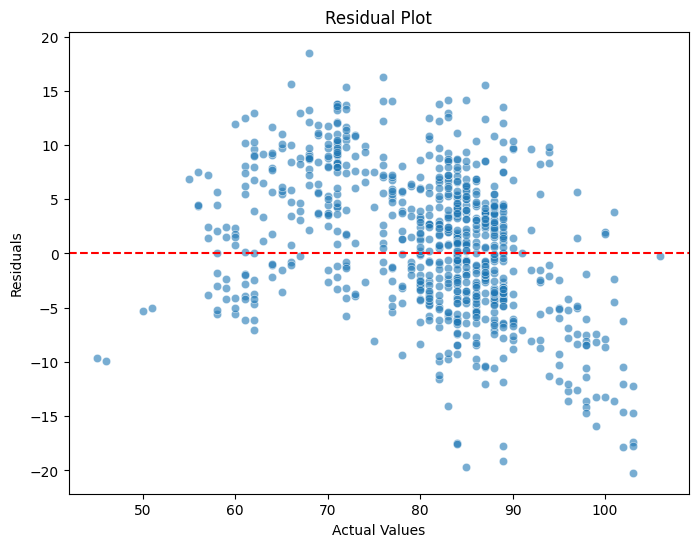

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert to NumPy arrays
plot_x = np.array(plot_x)  # Actual values
plot_y = np.array(plot_y)  # Predicted values

# Compute residuals (Predicted - Actual)
residuals = plot_y - plot_x

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=plot_x, y=residuals, alpha=0.6)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()

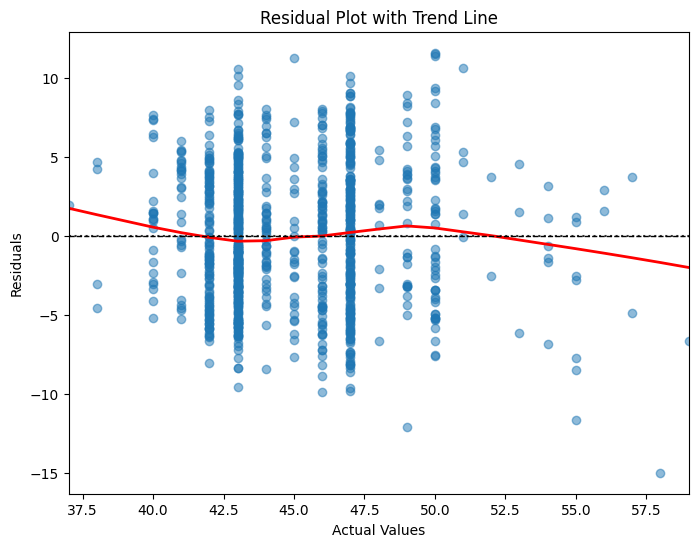

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.residplot(x=plot_x, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})

# Labels and title
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)  # Reference line at zero
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot with Trend Line")
plt.show()

In [34]:
y_holdout = y_holdout.tolist()
out_df = pd.DataFrame(data={"y_orig": y_holdout, "y_pred": all_preds})
out_df.to_csv("y_orig_vs_y_pred_dtf.csv", sep=',',index=False)

<Figure size 2000x2000 with 0 Axes>

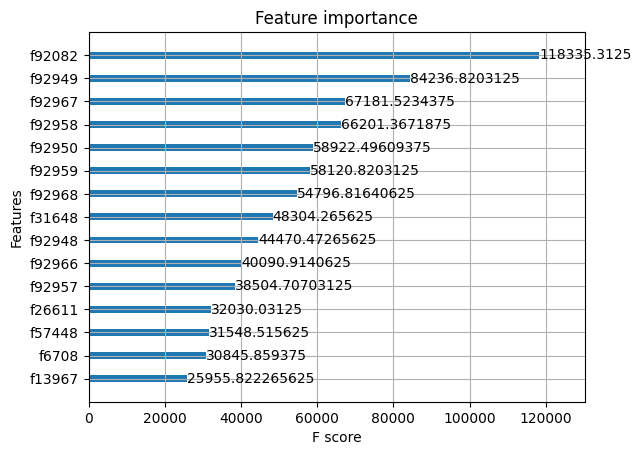

In [35]:
from xgboost import plot_importance
from matplotlib import pyplot
#best_model = pickle.load(open("best_model_lentil_chr_50.pickle.dat", "rb"))
plt.figure(figsize = (20, 20))
plot_importance(best_model, max_num_features=15, importance_type='gain', height=0.3)
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

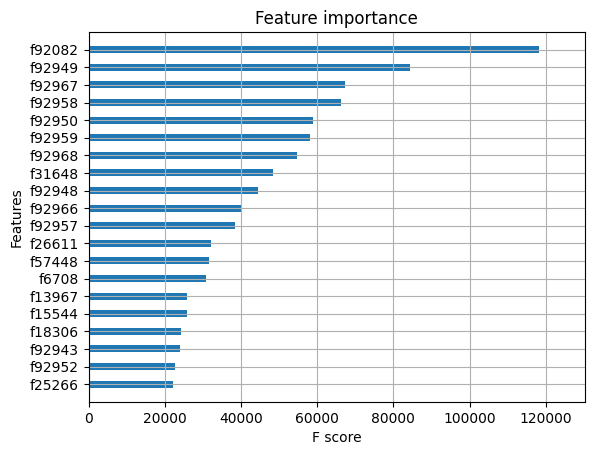

In [36]:
plot_importance(best_model, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)

In [16]:
f_names = ['f' + str(i) for i in range(len(ohe_data.columns))]
my_dict = best_model.get_booster().get_score(importance_type="gain")

new_dict = {}
for key in my_dict:
    ind = f_names.index(key)
    new_dict[ohe_data.columns[ind]] = my_dict[key]

new_fi = pd.Series(new_dict)
df = new_fi.to_frame()
df = df.rename(columns = {0:'F_Score(GAIN)'})

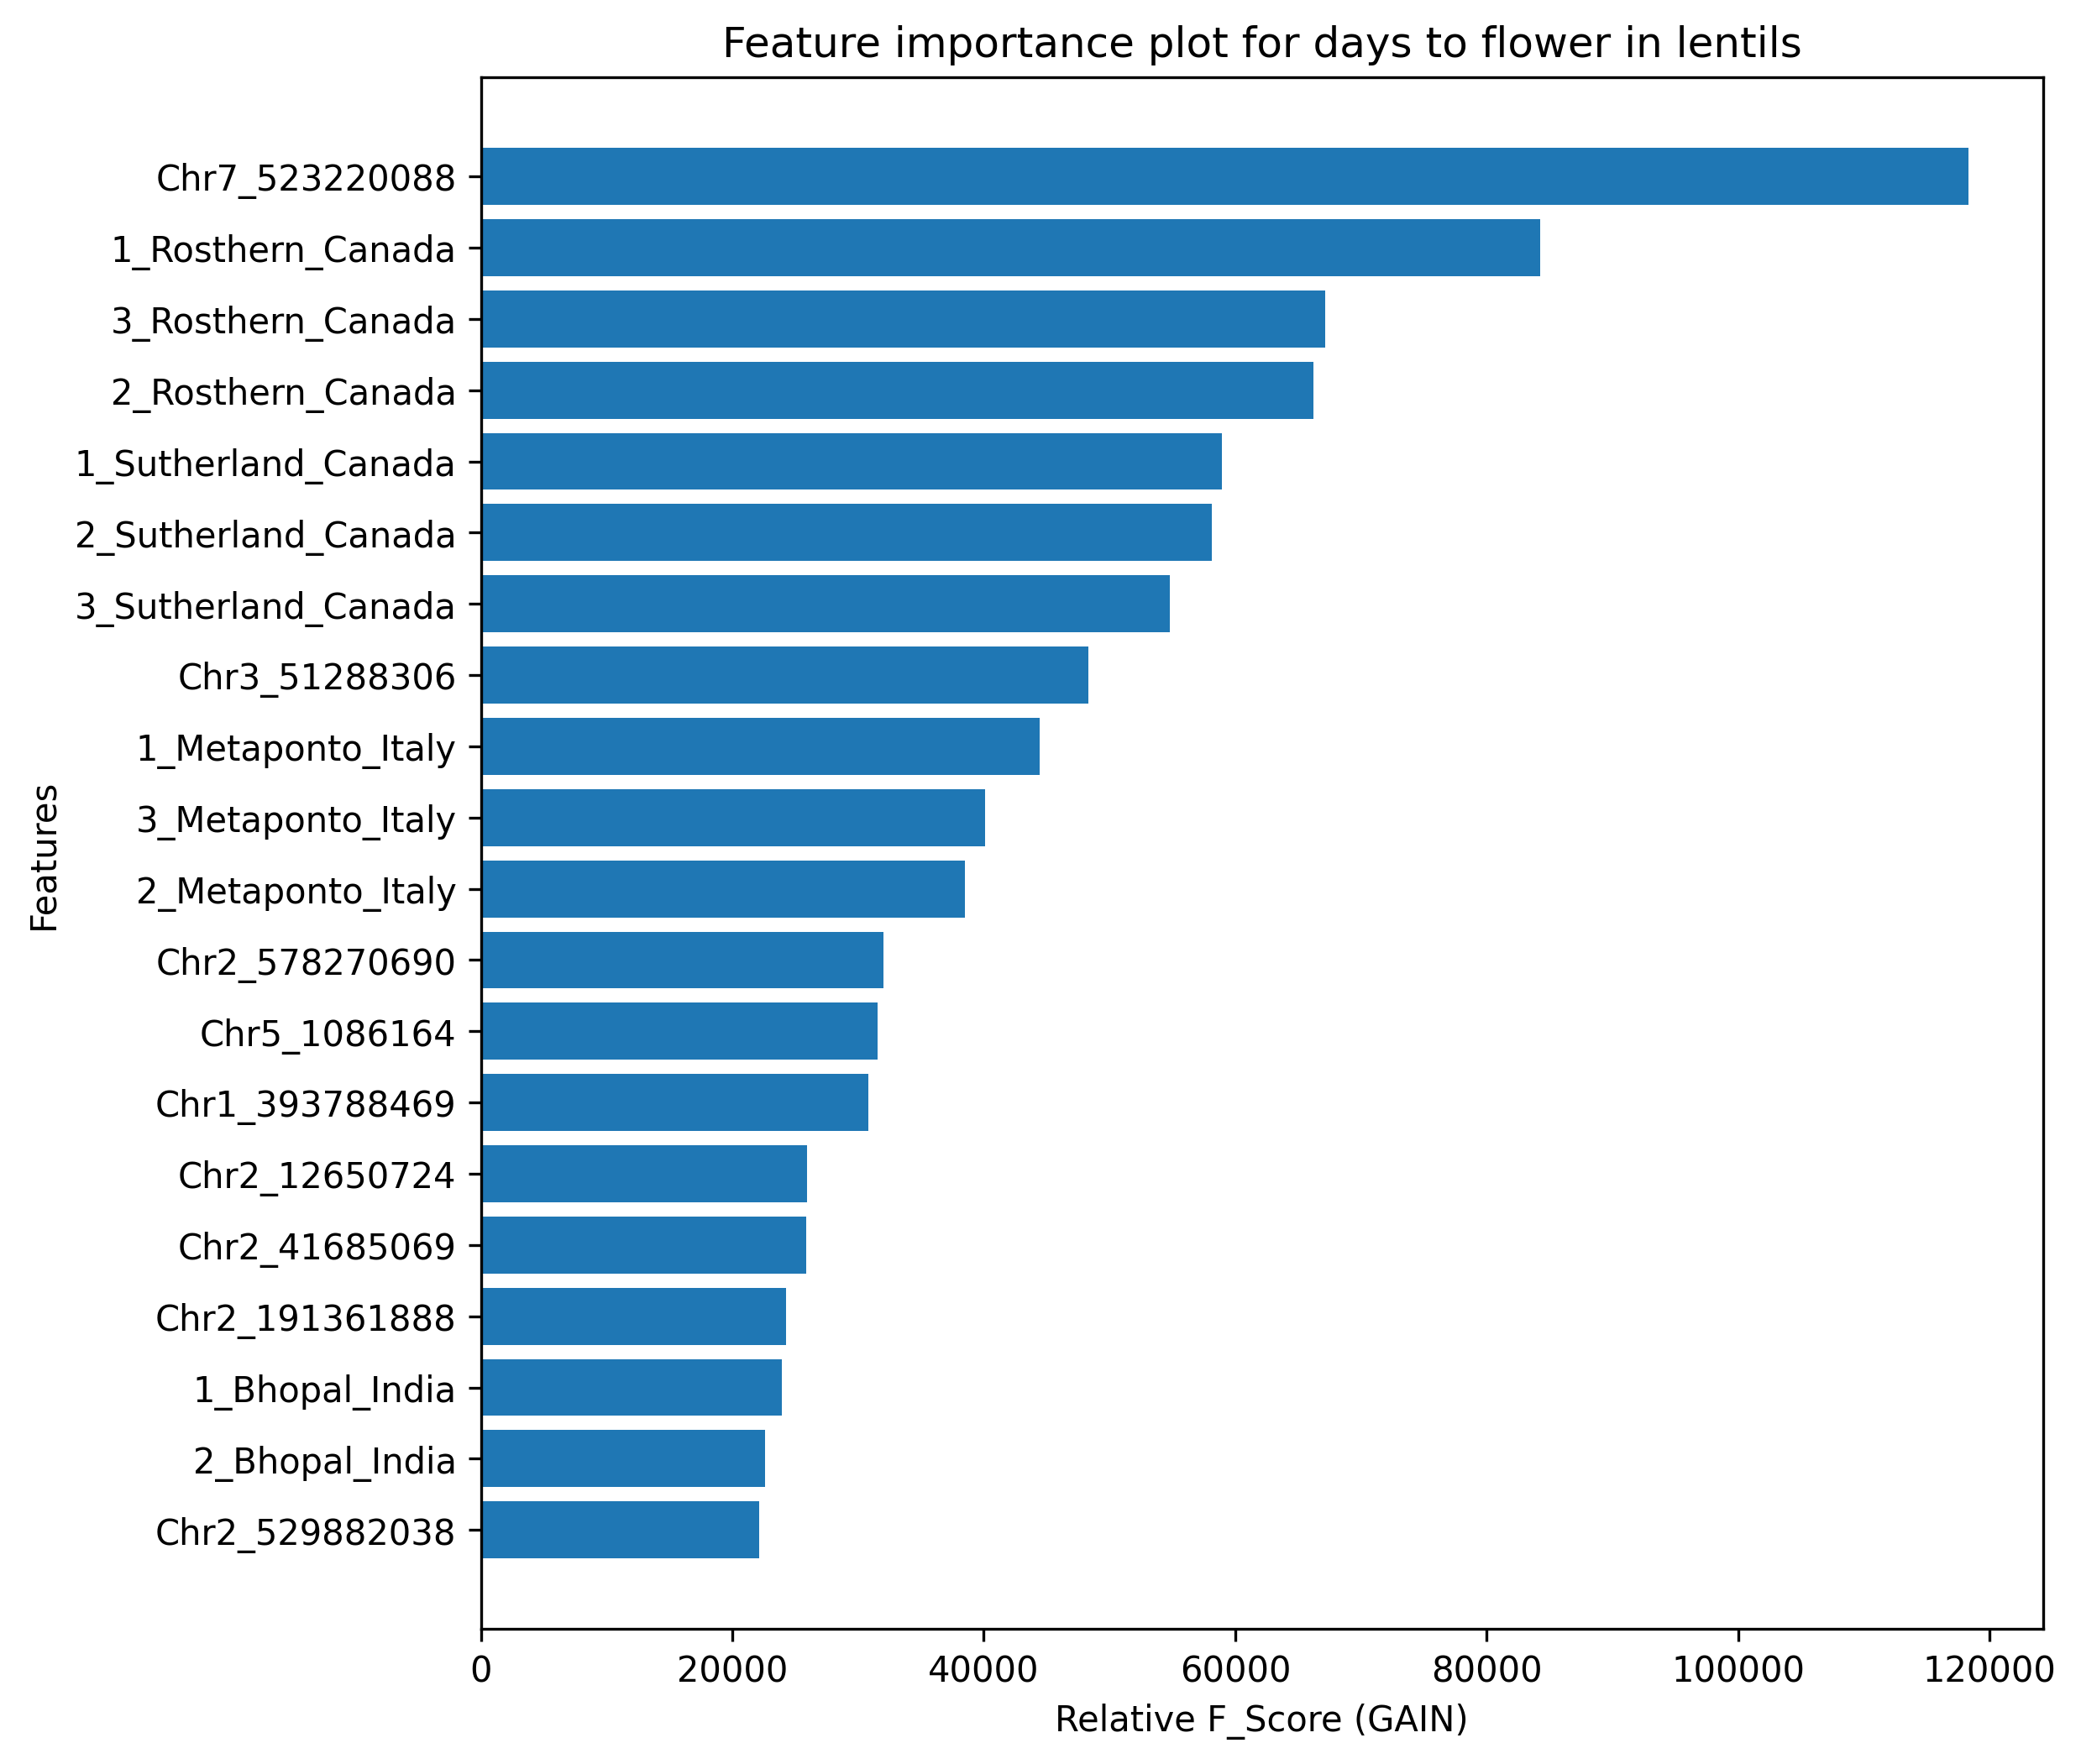

In [17]:
#plot dataframe now with top 20 SNPS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k')
indexes = df.nlargest(20, "F_Score(GAIN)").index
values = df.nlargest(20, "F_Score(GAIN)").values.ravel()
indexes = indexes[::-1]
values = values[::-1]
plt.barh(indexes, values)
plt.title('Feature importance plot for days to flower in lentils')
plt.ylabel('Features')
plt.xlabel('Relative F_Score (GAIN)')
plt.savefig('XGBoost Feature importance plot for days to flower in lentils.png')

In [18]:
explainer = shap.Explainer(best_model)

In [19]:
shap_values = explainer(X_train)

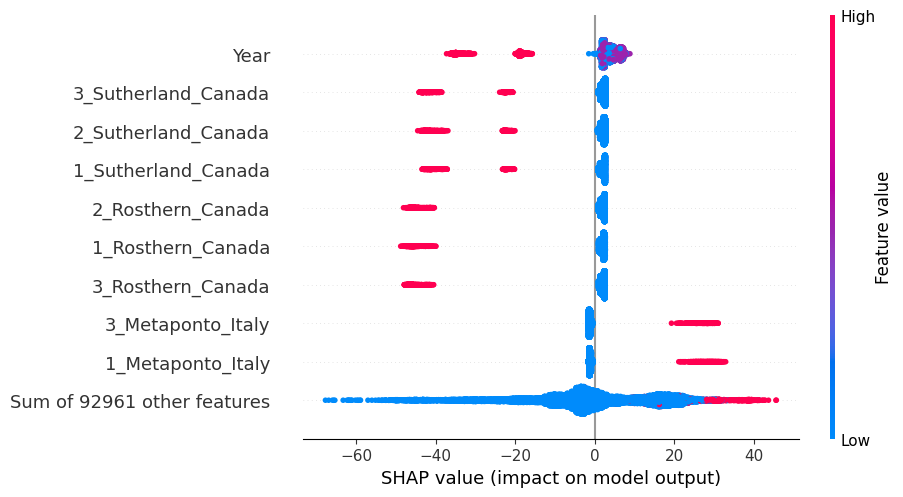

In [20]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.scatter(shap_values)

In [21]:
from sklearn.svm import LinearSVR

In [22]:
model_to_set = LinearSVR(max_iter=5000)

In [63]:
parameters = {
        'epsilon': [0.5, 1, 1.5, 2, 2.5, 3],                                                                             
        }

In [30]:
VM_linear =  LinearSVR(epsilon=3)
SVM_linear.fit(X_train, y_train.values.ravel())

TypeError: fit() missing 1 required positional argument: 'y'

In [33]:
SVM_linear.fit(X_train,y_train.values.ravel())

TypeError: fit() missing 1 required positional argument: 'y'

In [31]:
y_train.head()

,DTF
Accession_name,
CN_105605_AGL,110.0
PI_320937_LSP_AGL,58.0
PI_432245_LSP_AGL,113.0
PI_518731_LSP_AGL,126.0
PI_193550_AGL,108.0


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
model_to_set = RandomForestRegressor(n_jobs=-1 )

In [13]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(snps,dtf.values.ravel())

In [38]:
y_pred_rfr = rfr.predict(X_test)

In [39]:
r2_score(y_test, y_pred_rfr)

0.977932648351425

In [40]:
mse = mean_squared_error(y_test, y_pred_rfr)

In [41]:
rmse = np.sqrt(mse)

In [42]:
print(rmse)

5.251025312538276
